<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-semanales-iayaa-RodrigoPepi/blob/main/Actividad_Semana_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import matplotlib.pyplot as plt 
import random 
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# Se definen las 3 variables en el array mostrado 
x1 = np.array([-.72,2.15,-3.23,5,.73,-1.6,4,.61,.94])  # Primer factor lineal
x2 = x1*x1              # Segundo factor cuadrático
x3 = x1*x1*x1           #Tercer factor cúbico

# Definir matriz con datos de entrada X como un dataframe
# La matriz estara formada por 3 columnas con factores lineales, cuadraticos y cubicos

w = np.concatenate((np.vstack(x1),np.vstack(x2),np.vstack(x3)),axis = 1)
w.shape

X = pd.DataFrame(w,columns=['x1','x2','x3'])
X.head()


,x1,x2,x3
0,-0.72,0.5184,-0.373248
1,2.15,4.6225,9.938375
2,-3.23,10.4329,-33.698267
3,5.00,25.0000,125.000000
4,0.73,0.5329,0.389017


In [29]:
# Se definen los pesos a los ponderadores de manera arbitraria
# Se establece relación polinomial cúbica en cada salida de la variable Y:

w0 = 180
w1 = -3/4
w2 = -45
w3 = 70

print('Pesos (coeficientes) de una función polinomial de grado cúbico como función de salida:')
print('lineal: %.2f, cuadrático: %.2f cubo: %.2f' % (w1, w2, w3))

Pesos (coeficientes) de una función polinomial de grado cúbico como función de salida:
lineal: -0.75, cuadrático: -45.00 cubo: 70.00


<function matplotlib.pyplot.show(*args, **kw)>

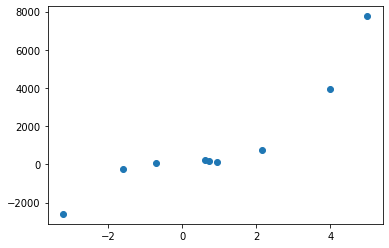

In [34]:
# Se define la variable de salida con algo de ruido para que el problema no
# se reduzca a ser sólo un problema de interpolación

random.seed(1)
yreal =[]
for x in x1: 
  noise=200*(random.random()-0.5)
  cc = w3*np.power(x,3) + w2*np.power(x,2) + w1*x + w0 + noise
  yreal.append(cc)

plt.scatter(x1,yreal)
plt.show


In [41]:
# Definimos 4 modelos: el de regresión lineal múltiple
# De RLM con regularización de Lasso
# RLM con regularización de Ridge
# Regularización de Elasticnet

modelos = []
modelos.append(('LR',LinearRegression()))
modelos.append(('LASSO', Lasso(alpha = 21))) # entre más aumenta su valor, más penaliza los pesos y comienzan a tender a cero; sólo a los que considera no relevantes
modelos.append(('RIDGE', Ridge(alpha=30)))    # ebtre más aumenta su valore, todos los factores son penalizados haciéndolos tender a cero
modelos.append(('EN',ElasticNet(alpha=1, l1_ratio=.5)))

yhat0 = []  # Predicciones modelo RLM
yhat1 = []  # Predicciones modelo RLM L1
yhat2 = []  # Predicciones modelo RLM L2
yhat12 = [] # Predicciones modelo RLM L1 y L2

for name, model in modelos: 
    #entrenamos el modelo seleccionado y obtenemos sus predicciones: 
    print('%s:' % name)
    mm = model.fit(X, np.ravel(yreal))
    yhat = mm.predict(X)
  
    print(mm.intercept_)   # por si deseas conocer w0.
    print(mm.coef_)       # despliegue de los pesos obtenidos

    if name=='LR':
      yhat0.append(yhat)
      print('\n')
    elif name=='LASSO':
      yhat1.append(yhat)
      print('\n')
    elif name=='RIDGE':
      yhat2.append(yhat)
      print('\n')
    else:
      yhat12.append(yhat)


LR:
152.69055374540085
[ 28.12824361 -37.06218579  67.10624522]


LASSO:
157.44592563124615
[  9.97553613 -38.1952211   68.14973485]


RIDGE:
135.63924309471054
[ 12.84674296 -32.34307223  67.02228567]


EN:
151.87885769427396
[ 21.2605907  -36.78575768  67.38107205]


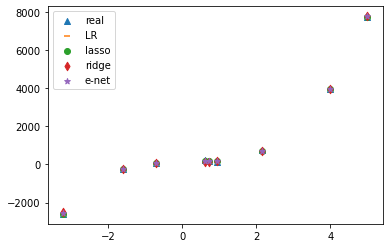

In [40]:
# Para Visualizar los resultados obtenidos
plt.scatter(x1, np.ravel(yreal), marker='^', label='real')  

plt.scatter(x1, np.ravel(yhat0), marker='_', label='LR')  
plt.scatter(x1, np.ravel(yhat1), marker='o', label='lasso')  
plt.scatter(x1, np.ravel(yhat2), marker='d', label='ridge')  
plt.scatter(x1, np.ravel(yhat12), marker='*', label='e-net')

plt.legend(loc=2)
plt.show()

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression # LRM
from sklearn.tree import DecisionTreeClassifier     # DTM
from sklearn.neural_network import MLPClassifier    # MLPC
from sklearn.neighbors import KNeighborsClassifier  #KNM
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

mypath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat'

data = pd.read_csv(mypath, sep=' ', header = None)
data.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','class']
print(data.shape)
data.head()


(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [43]:
# Revisar distribución de los datos de los factores se deben de agrupar los factores que representen menos que un 5% de la información
data['A4'].value_counts() #Revisamos los valores del factor A4

2    525
1    163
3      2
Name: A4, dtype: int64

In [45]:
data['A5'].value_counts()

8     146
11     78
9      64
3      59
6      54
1      53
4      51
13     41
14     38
7      38
2      30
10     25
5      10
12      3
Name: A5, dtype: int64

In [46]:
data['A6'].value_counts()

4    408
8    138
5     59
1     57
3      8
9      8
2      6
7      6
Name: A6, dtype: int64

In [47]:
data['A8'].value_counts()

1    361
0    329
Name: A8, dtype: int64

In [48]:
data['A9'].value_counts()

0    395
1    295
Name: A9, dtype: int64

In [49]:
data['A11'].value_counts()

0    374
1    316
Name: A11, dtype: int64

In [50]:
data['A12'].value_counts()

2    625
1     57
3      8
Name: A12, dtype: int64

In [51]:
data['A4'] = data['A4'].map({2:2, 1:0, 3:0})
data['A5'] = data['A5'].map({1:1,2:0,3:3,4:4,5:0,6:6,7:7,8:8,9:9,10:0,11:11,12:0,13:13,14:14})
data['A6'] = data['A6'].map({1:1,2:0,3:0,4:4,5:5,7:0,8:8,9:0})
data['A8'] = data['A8'].map({0:0, 1:1})
data['A11'] = data['A11'].map({0:0, 1:1})
data['A12'] = data['A12'].map({2:2, 1:0, 3:0})
# Ahora sí, definimos nuestras variables de entrada y de salida, observamos que ambas son DataFrames de Pandas:

X = data.iloc[:,:-1]  

Y = data.iloc[:,-1]     # También puede ser: data[['class']]
# Se considera sólo el 80% de la base para hacer validación cruzada y se deja el 20% para hacer pruebas

Xcv, Xtest, ycv, ytest = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)  

print(Xcv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ycv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(552, 14) : dimensión de datos de entrada para entrenamiento y validación
(138, 14) : dimensión de datos de entrada para prueba
(552,) : dimensión de variable de salida para entrenamiento y validación
(138,) : dimensión de variable de salida para prueba


In [52]:
ycv.sum()/ycv.shape[0] # Porcentaje de los créditos que sí fueron aprobados

0.44565217391304346

In [53]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['A2','A3','A7','A10','A13','A14']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = [ 'A4','A5','A6','A12']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

# A continuación se muestran diferentes modelos de aprendizaje supervisado:
def get_models():
  modelos = list()
  nombres = list()

  # MLR - Modelo de Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # MDT - Modelo de Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # MLP - Red Neuronal Artificial / Perceptrón Lineal Multicapa:  
  modelos.append(MLPClassifier(hidden_layer_sizes=(30,), max_iter=3000))
  nombres.append('MLP')
  
  # SVM - Máquina de Vector Soporte:
  modelos.append(SVC(gamma='scale'))
  nombres.append('SVM')

  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier())
  nombres.append('kNN')
  
  return modelos, nombres

In [54]:
# Para respetar la distribución posible de las clases en cada partición se tienen que tener datos generados estratificadamente
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
  scores = cross_val_score(pipeline, Xcv, np.ravel(ycv), scoring='accuracy', cv=cv) # Realiza el pipeline de los datos de entrada xcv y ycv; califica en torno a 'precision'


  resultados.append(scores)
  print('>> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores))) # En esta línea de código se imprimen los valores de la media y de la desviación estándar

>> LR: 0.859 (0.041)
>> DT: 0.818 (0.054)
>> MLP: 0.840 (0.037)
>> SVM: 0.851 (0.041)
>> kNN: 0.795 (0.039)


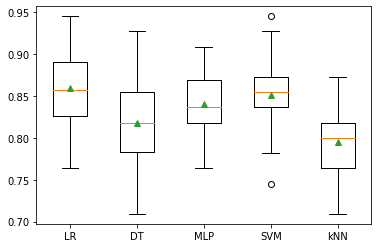

In [55]:
plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

In [56]:
#from pandas.core.common import random_state

def get_modelsRegs():
  modelos, nombres = list(), list()

  # LR - sin regularización:
  modelos.append(LogisticRegression(penalty='none', solver='lbfgs', max_iter=2000, random_state=1))
  nombres.append('LR')

  # Lasso:
  modelos.append(LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, C=1., random_state=1))
  nombres.append('LASSO')
  
  # Ridge:
  modelos.append(LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000, C=10.01, random_state=1))
  nombres.append('RIDGE')
  
  # Elastic-Net:
  modelos.append(LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=4000, C=1., random_state=1))
  nombres.append('EN')

  return modelos, nombres
#‘newton-cg’ - [‘l2’, ‘none’] estas son las combinaciones aceptables para realizar penalizaciones, 
#‘lbfgs’ - [‘l2’, ‘none’]
#‘liblinear’ - [‘l1’, ‘l2’]
#‘sag’ - [‘l2’, ‘none’]
#‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

>> LR 0.862 (0.047)
>> LASSO 0.860 (0.045)
>> RIDGE 0.861 (0.046)
>> EN 0.859 (0.046)


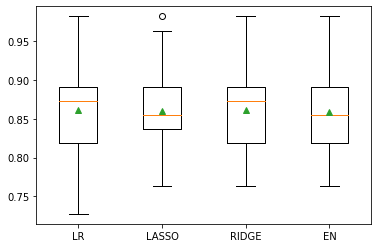

In [58]:
modelos, nombres = get_modelsRegs()
resultados = list() 

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)
  scores = cross_val_score(pipeline, Xcv, np.ravel(ycv), scoring='accuracy', cv=cv)

  resultados.append(scores)
  print('>> %s %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))


plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

In [60]:
# Llevar a cabo el fine tuning de los modelos
# Para realizar esta búsqueda, se utilizará la búsqueda por malla para encontrar una mejor configuración de híper parámetros
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
# RIDGE - métrica L2:

modelo = LogisticRegression(penalty='l2', max_iter=10000, random_state=1)

dicc_grid = {'C':[0.0001,0.01,0.1,1.0,10.,100.],
             'solver':['newton-cg','lbfgs','liblinear','sag','saga'] # Se crea diccionario par apoder utilizar diferentes configuraciones al evaluar
             }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring='accuracy')

# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(Xcv)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6)(5)=30 
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruzada,
# lo cual implica también un mayor tiempo de entrenamiento.

grid.fit(Xx, np.ravel(ycv))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_) # Se obtiene un 5% de mejoria contra el desempeño del modelo original
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.8637077922077921
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 100.0, 'solver': 'newton-cg'}
Métrica utilizada: accuracy


In [61]:
modelo = LogisticRegression(penalty='l2', 
                            max_iter=10000,
                            C=100.0,
                            solver='liblinear',
                            random_state=1)

# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(Xcv)
Xxt = Xct.transform(Xcv)
modelo.fit(Xxt, np.ravel(ycv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
print(modelo.score(Xxtest, np.ravel(ytest))) # Con este resultado se puede decir que el modelo tendrá el 84.06% en su desempeño promedio contra datos reales

0.8405797101449275


In [66]:
# Predicciones del modelo utilizando una matriz de confusion
pp = modelo.predict(Xxtest)
cm = confusion_matrix(ytest, pp)
print(cm)

[[63 14]
 [ 8 53]]


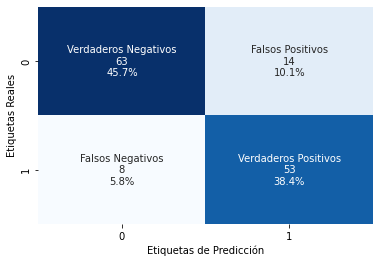

In [67]:
# Codigo para imprimir una matriz de confusion
txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()